In [6]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# File Handling
from glob import glob

# Audio Processing
import librosa
import librosa.display

# Interactive Audio Playback
import IPython.display as ipd

# Utility Functions
from itertools import cycle

# Set Plotting Theme
sns.set_theme(style="white", palette=None)

# Define Color Palette and Cycle for Visualizations
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(color_pal)

# SciKIt libraries(this is what your machine learning thing is derived from
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
audio_file1 = glob("/Users/Parag/Documents/TMRT_data/noteA.mp3")
audio_file2 = glob("/Users/Parag/Documents/TMRT_data/noteA#.mp3")
audio_file3 = glob("/Users/Parag/Documents/TMRT_data/noteB.mp3")
audio_file4 = glob("/Users/Parag/Documents/TMRT_data/noteC.mp3")
audio_file5 = glob("/Users/Parag/Documents/TMRT_data/noteC#.mp3")
audio_file6 = glob("/Users/Parag/Documents/TMRT_data/noteD.mp3")
audio_file7 = glob("/Users/Parag/Documents/TMRT_data/noteD#.mp3")
audio_file8 = glob("/Users/Parag/Documents/TMRT_data/noteE.mp3")
audio_file9 = glob("/Users/Parag/Documents/TMRT_data/noteF.mp3")
audio_file10 = glob("/Users/Parag/Documents/TMRT_data/noteF#.mp3")
audio_file11 = glob("/Users/Parag/Documents/TMRT_data/noteG.mp3")
audio_file12 = glob("/Users/Parag/Documents/TMRT_data/noteG#.mp3")



#or 
audioFiles = []
noteList =["A",'A#','B','C','C#','D','D#','E','F','F#','G','G#']
for x in noteList:
    audioFiles+=glob(f"/Users/Parag/Documents/TMRT_data/note{x}.mp3")


In [8]:
#audio_file1
print("Play the A note on the tuning fork at 440Hz")
ipd.Audio(audio_file1[0])



Play the A note on the tuning fork at 440Hz


In [9]:
#audio_file2

print("Play the B note on the tuning fork at 440Hz")
ipd.Audio(audio_file2[0])

Play the B note on the tuning fork at 440Hz


In [10]:
#next Loading the audio files data
#first for the first audio file
Atime , Asr = librosa.load(audio_file1[0])
#displaying the first ten samples
print(f"The first 10 samples of note A {Atime[:10]}")
print(f"The shape of Atime {Atime.shape}")
print(f"The sample rate for the A note file {Asr}")

The first 10 samples of note A [-1.1166938e-23  9.0989867e-24 -4.4460958e-24  1.9438744e-23
 -4.6528909e-25 -1.6130022e-23 -6.6174449e-24 -6.4106497e-24
  8.4786013e-24  2.8537731e-23]
The shape of Atime (443904,)
The sample rate for the A note file 22050


In [11]:
#for the second audio file
Btime,Bsr = librosa.load(audio_file2[0])
#displaying the first ten samples,shape and samplerate
print(f"The first 10 samples of note B{Btime[:10]}")
print(f"The shape of Btime {Btime.shape}")
print(f"The sample rate for the B note file {Bsr} \n")
print("I looked up why im gettin a bunch of zeros in the first then samples -> Theres this thing called a DC offset which gets added to a files beginning , librosa counteracts by substracting the audio file with the mean of the samples and so we get a value that is very close to zero which gets approximated to zero")

The first 10 samples of note B[-9.09898674e-24  1.75775880e-23 -1.17873237e-23  1.59232268e-23
  5.37667398e-24  6.41064975e-24 -7.65142067e-24  2.99852972e-24
  4.92430958e-24 -1.28212995e-23]
The shape of Btime (443904,)
The sample rate for the B note file 22050 

I looked up why im gettin a bunch of zeros in the first then samples -> Theres this thing called a DC offset which gets added to a files beginning , librosa counteracts by substracting the audio file with the mean of the samples and so we get a value that is very close to zero which gets approximated to zero


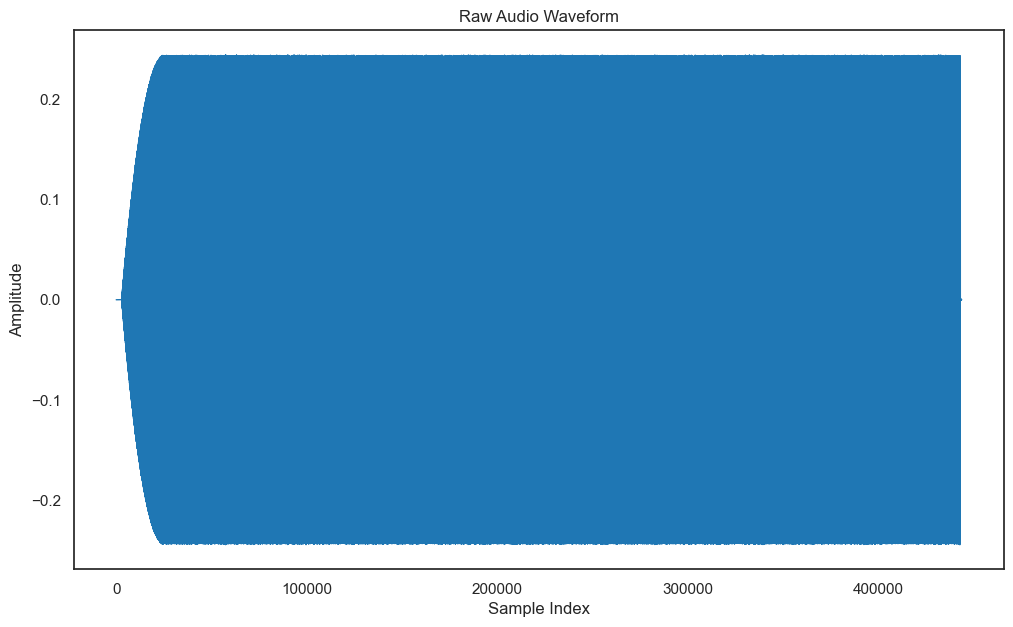

In [12]:
#Plotting the raw audiowaveform for the A note
# Plot the raw audio waveform
pd.Series(Atime).plot(
    figsize=(12, 7),             # Set the figure size for better visibility
    lw=1,                       # Line width for the waveform
    title="Raw Audio Waveform", # Title of the plot
    color=color_pal[0],         # Set the color using the predefined palette
    xlabel="Sample Index",      # Label for the x-axis
    ylabel="Amplitude"          # Label for the y-axis
)

# Display the plot
plt.show()

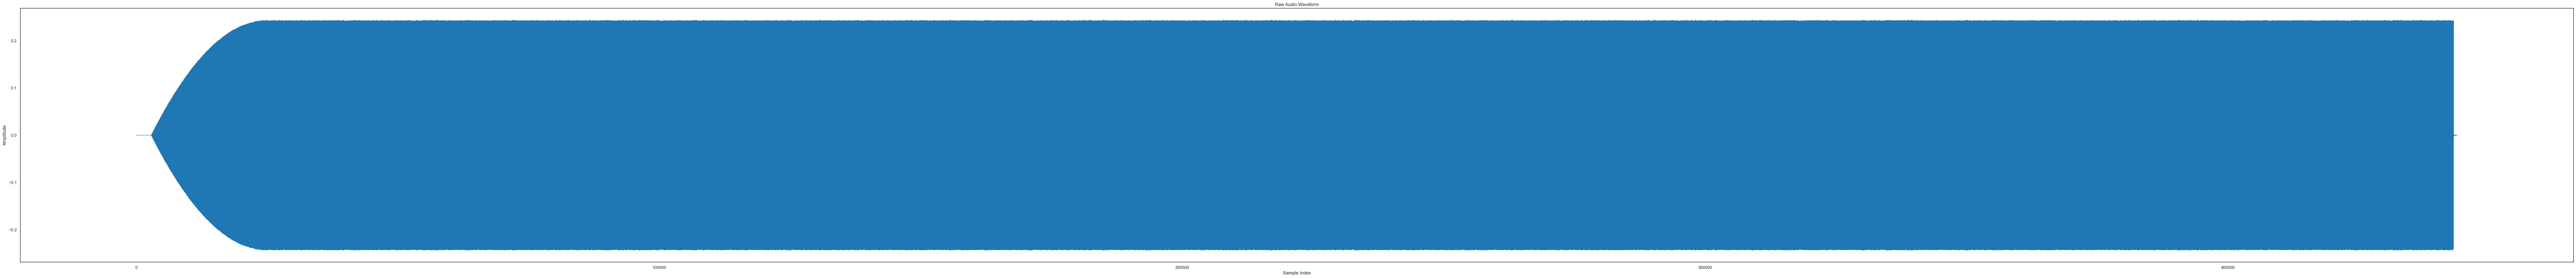

In [13]:

pd.Series(Atime).plot(
    figsize=(120, 12),             # Set the figure size for better visibility
    lw=1,                       # Line width for the waveform
    title="Raw Audio Waveform", # Title of the plot
    color=color_pal[0],         # Set the color using the predefined palette
    xlabel="Sample Index",      # Label for the x-axis
    ylabel="Amplitude"          # Label for the y-axis
)

# Display the plot
plt.show()

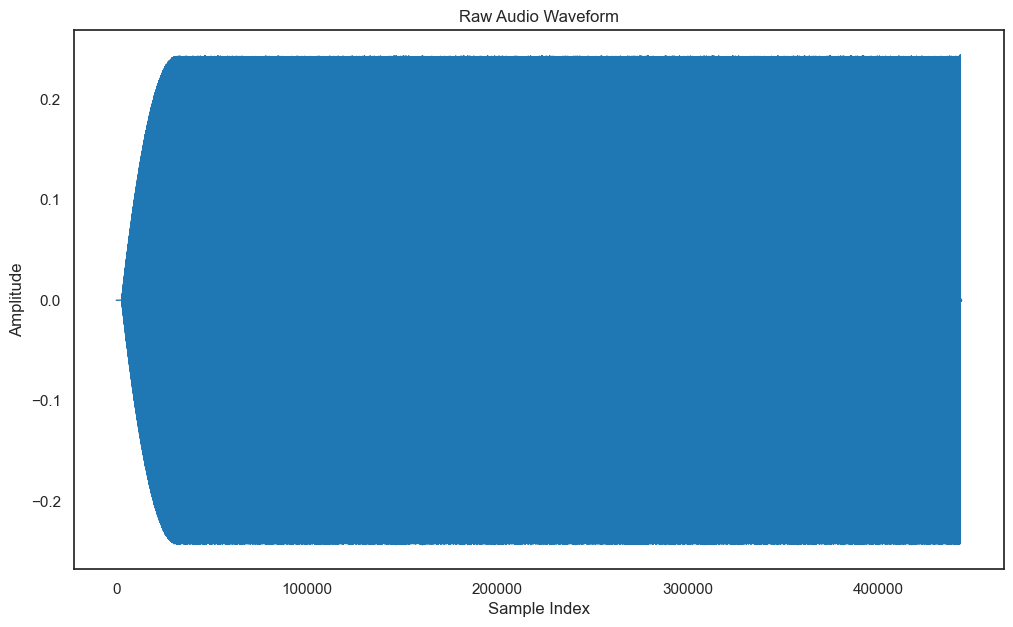

In [14]:
#for the B note
pd.Series(Btime).plot(
    figsize=(12, 7),             # Set the figure size for better visibility
    lw=1,                       # Line width for the waveform
    title="Raw Audio Waveform", # Title of the plot
    color=color_pal[0],         # Set the color using the predefined palette
    xlabel="Sample Index",      # Label for the x-axis
    ylabel="Amplitude"          # Label for the y-axis
)

# Display the plot
plt.show()

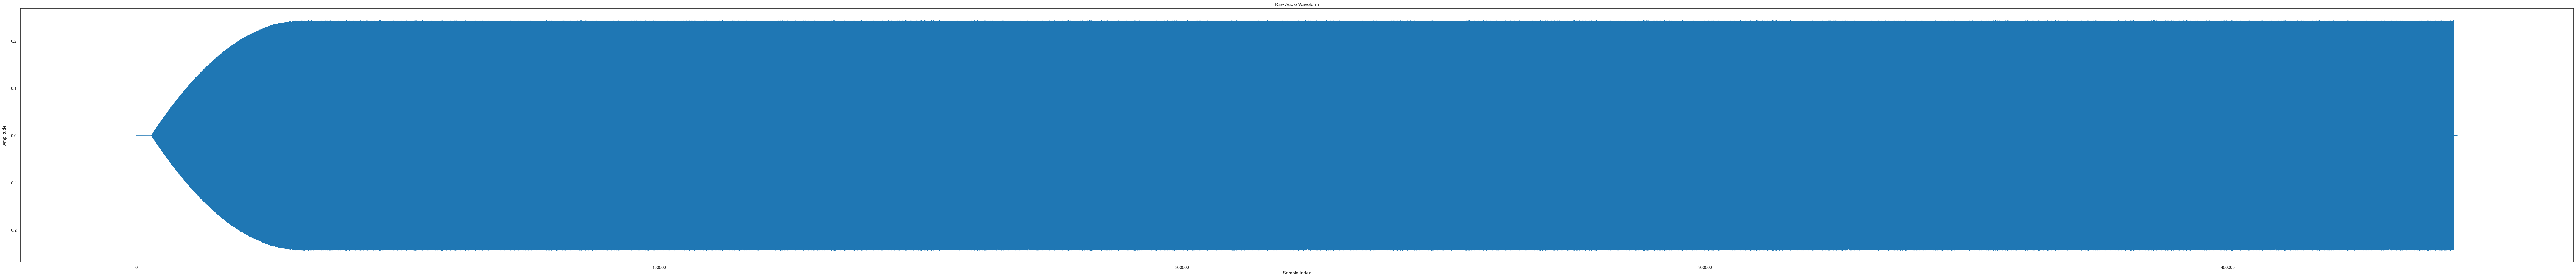

In [15]:

pd.Series(Btime).plot(
    figsize=(120, 12),             # Set the figure size for better visibility
    lw=1,                       # Line width for the waveform
    title="Raw Audio Waveform", # Title of the plot
    color=color_pal[0],         # Set the color using the predefined palette
    xlabel="Sample Index",      # Label for the x-axis
    ylabel="Amplitude"          # Label for the y-axis
)

# Display the plot
plt.show()

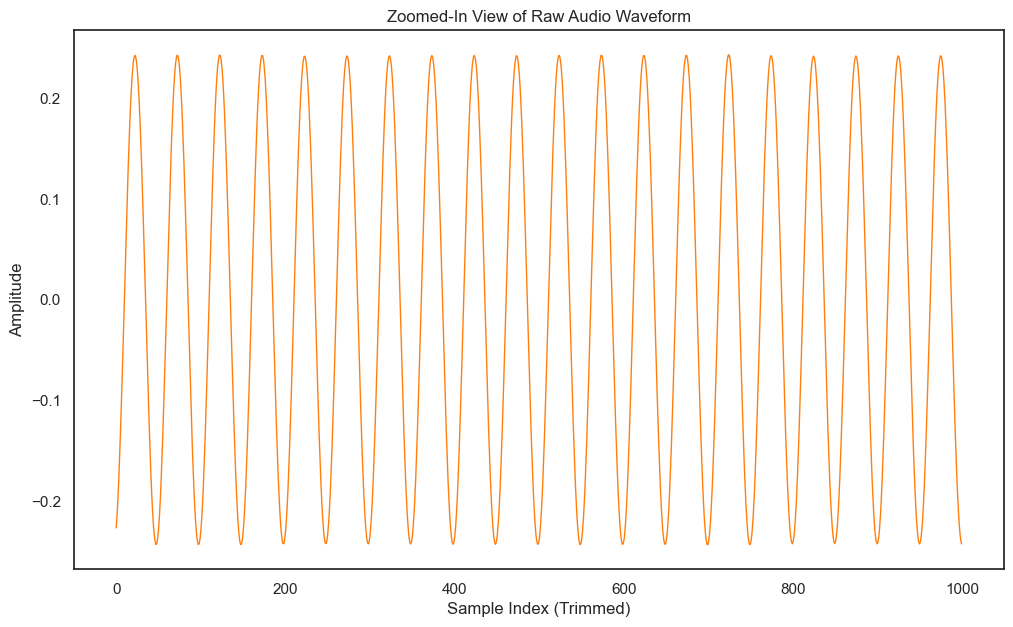

In [16]:
# Plotting a trimmed section 
pd.Series(Atime[30000:31000]).plot(
    figsize=(12, 7),               # Set figure size for better visibility
    lw=1,                         # Line width for the waveform
    title="Zoomed-In View of Raw Audio Waveform",  # Descriptive title for clarity
    color=color_pal[1],           # Use a consistent color palette for aesthetics
    xlabel="Sample Index (Trimmed)", # X-axis label indicating the zoomed-in range
    ylabel="Amplitude"            # Y-axis label for amplitude values
)

# Display the plot
plt.show()

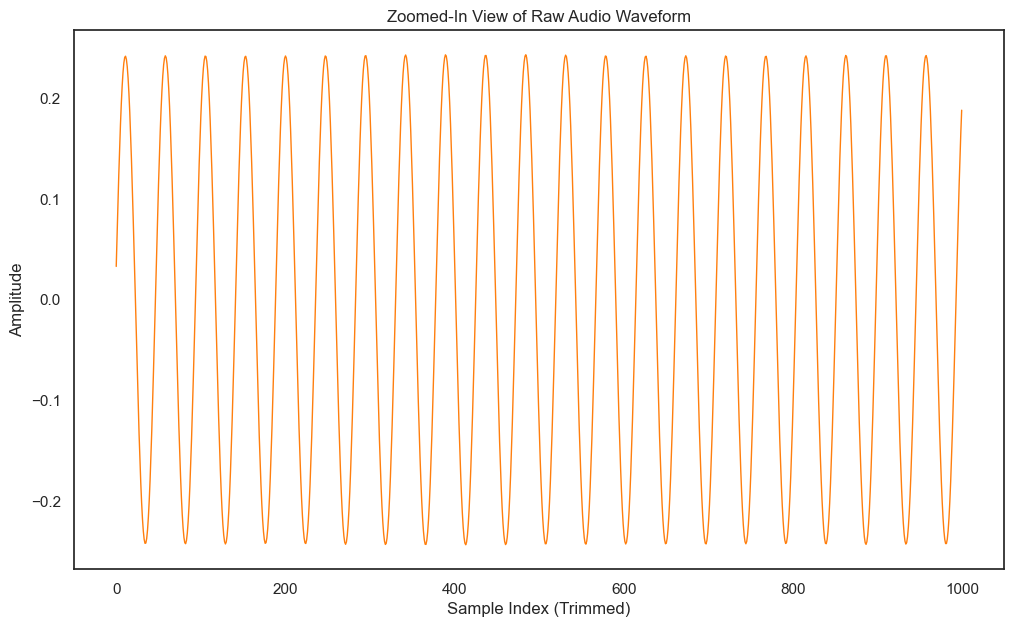

In [17]:
# Plotting a trimmed section
pd.Series(Btime[30000:31000]).plot(
    figsize=(12, 7),               # Set figure size for better visibility
    lw=1,                         # Line width for the waveform
    title="Zoomed-In View of Raw Audio Waveform",  # Descriptive title for clarity
    color=color_pal[1],           # Use a consistent color palette for aesthetics
    xlabel="Sample Index (Trimmed)", # X-axis label indicating the zoomed-in range
    ylabel="Amplitude"            # Y-axis label for amplitude values
)

# Display the plot
plt.show()

In [18]:
#now taking the short time fourier transforms of both the notes
#this is to convert the graph that we have from a time domain to a frequency domain to then further use in a spectrograph
Astft = librosa.stft(Atime)
Bstft = librosa.stft(Btime)
# conveting both the fourier transforms into decibels (logarithmic scael)->this is more closer to what humans hear and understand
Astft_db = librosa.amplitude_to_db(np.abs(Astft),ref = np.max)
Bstft_db = librosa.amplitude_to_db(np.abs(Bstft),ref = np.max)
print(f"printing the shape of the A notes spectrogram {Astft_db.shape}")
print(f"printing the shape of the B notes spectrogram {Bstft_db.shape}")
# (n_freq_bins, n_time_frames) ->Shape


printing the shape of the A notes spectrogram (1025, 868)
printing the shape of the B notes spectrogram (1025, 868)


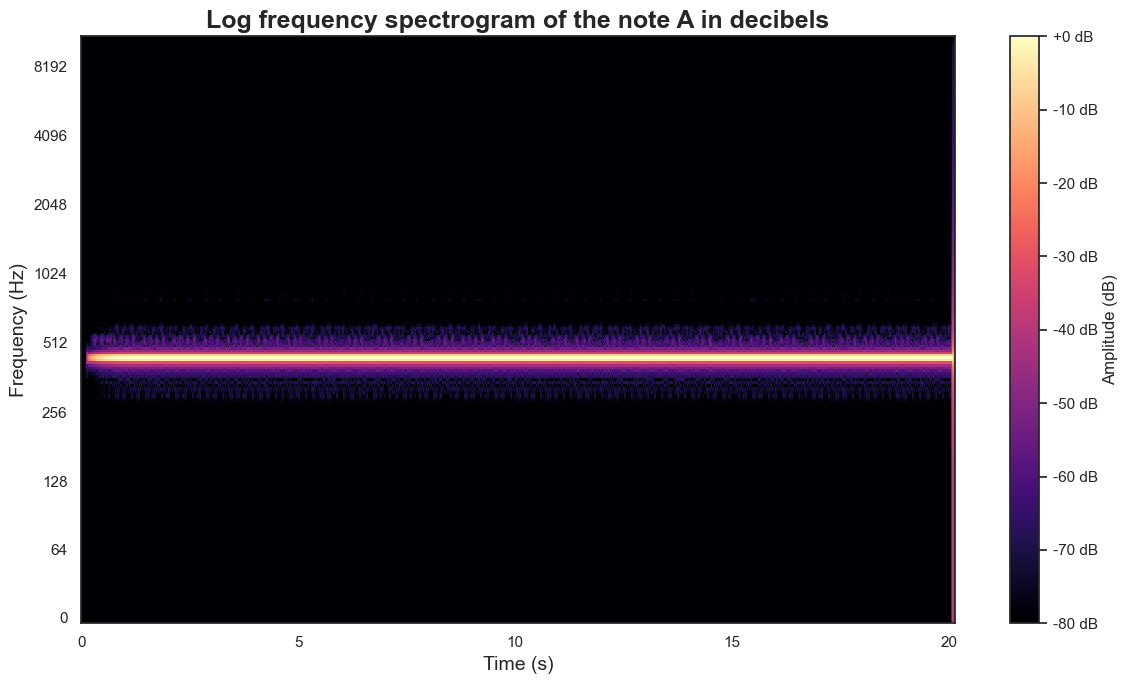

In [19]:
# plotting the log frequency spectrogram for the note A

fig ,ax = plt.subplots(figsize=(12,7))
img = librosa.display.specshow(Astft_db, x_axis = "time",y_axis = "log" , sr = Asr,cmap = "magma" , ax=ax)
ax.set_title("Log frequency spectrogram of the note A in decibels", fontsize=18, fontweight='bold')
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Frequency (Hz)", fontsize=14)

# Add a color bar to indicate decibel levels
cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label("Amplitude (dB)", fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

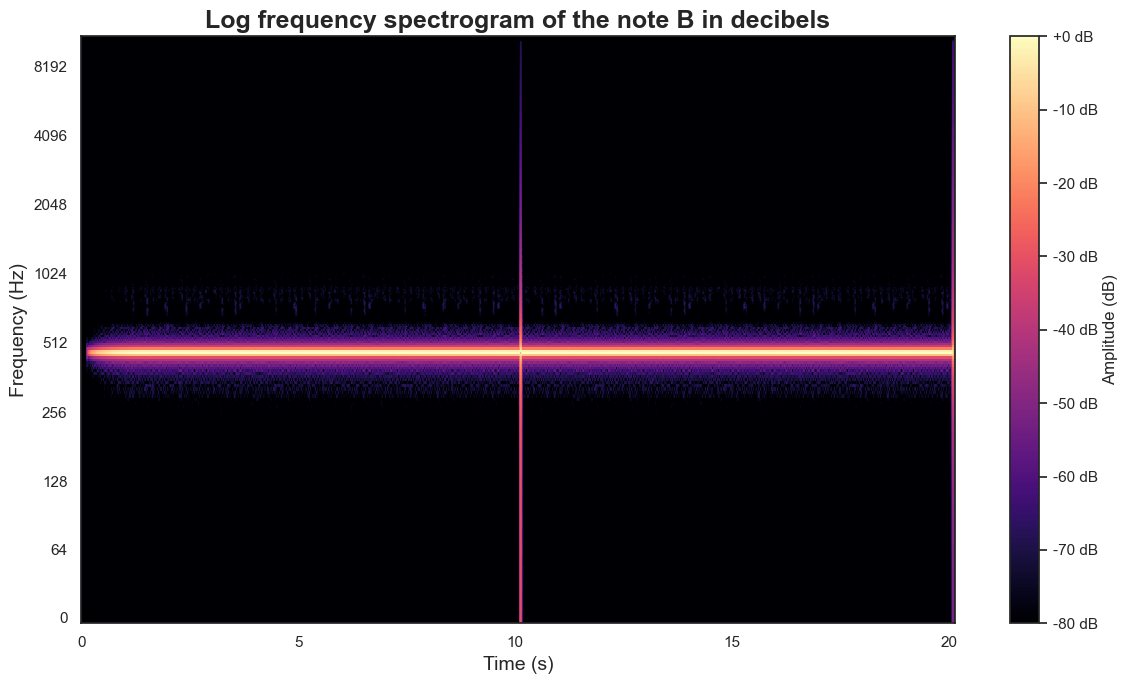

In [20]:
# plotting the log frequency spectrogram for the note B

fig ,ax = plt.subplots(figsize=(12,7))
img = librosa.display.specshow(Bstft_db, x_axis = "time",y_axis = "log" , sr = Asr,cmap = "magma" , ax=ax)
ax.set_title("Log frequency spectrogram of the note B in decibels", fontsize=18, fontweight='bold')
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Frequency (Hz)", fontsize=14)

# Add a color bar to indicate decibel levels
cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label("Amplitude (dB)", fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [21]:
ipd.Image(url='https://wikimedia.org/api/rest_v1/media/math/render/svg/102948b0039fc05f0516b9f1e8e3f452062d3be6')

In [22]:
print("A Mel Spectrogram is a type of spectrogram where the frequency axis is scaled according to the Mel scale, which aligns closely with the way humans perceive sound and pitch. It is widely used in audio processing and machine learning, particularly in tasks like speech recognition, music analysis, and audio classification.")

A Mel Spectrogram is a type of spectrogram where the frequency axis is scaled according to the Mel scale, which aligns closely with the way humans perceive sound and pitch. It is widely used in audio processing and machine learning, particularly in tasks like speech recognition, music analysis, and audio classification.


In [23]:
A_mel_spectrogram_shape =librosa.feature.melspectrogram(y=Atime ,sr =Asr,n_mels = 128)
print(f"mel spectrograms shape for note A : {A_mel_spectrogram_shape}")

mel spectrograms shape for note A : [[7.0717218e-31 6.8558216e-21 1.5559253e-14 ... 1.8056446e-01
  2.1694279e-01 9.6334480e-03]
 [4.3253702e-31 7.2070235e-21 2.7842371e-14 ... 1.8755974e-01
  2.2593592e-01 1.0065172e-02]
 [1.8615114e-31 6.5560902e-21 1.9178788e-14 ... 1.9394916e-01
  2.3142473e-01 1.0027794e-02]
 ...
 [1.4668376e-30 8.8734677e-21 2.3761473e-14 ... 6.6056702e-05
  7.7382079e-05 3.2629134e-06]
 [1.6819144e-30 1.5885492e-20 1.7985261e-14 ... 3.8485075e-05
  4.5087931e-05 1.9151814e-06]
 [3.5028750e-30 1.8873335e-21 7.5541283e-16 ... 3.4517634e-06
  4.0610471e-06 1.7709561e-07]]


In [24]:
B_mel_spectrogram_shape =librosa.feature.melspectrogram(y=Btime ,sr =Bsr,n_mels = 128)
print(f"mel spectrograms shape for note B : {B_mel_spectrogram_shape}")

mel spectrograms shape for note B : [[3.46658437e-30 2.54865560e-22 2.91814418e-16 ... 9.10274033e-03
  8.88917129e-03 2.38646579e-04]
 [6.13239943e-30 5.52636772e-22 3.72435675e-16 ... 1.14563908e-02
  1.16819395e-02 3.57331010e-04]
 [7.23772523e-30 2.33869990e-21 2.75738278e-15 ... 1.51276067e-02
  1.58625692e-02 5.33542247e-04]
 ...
 [1.00554326e-30 1.84614192e-21 9.03237564e-15 ... 4.81547584e-04
  5.65372757e-04 2.39531873e-05]
 [2.59673078e-30 8.66415045e-22 2.50657441e-15 ... 2.63061433e-04
  3.08489281e-04 1.31168317e-05]
 [7.90363958e-30 1.33051704e-22 2.65717915e-16 ... 2.37024342e-05
  2.77877734e-05 1.20673826e-06]]


In [25]:
# Convert the Mel Spectrogram to Decibels (Logarithmic Scale)
A_db_mel = librosa.amplitude_to_db(A_mel_spectrogram_shape, ref=np.max)

# Display Information
print(f"Mel Spectrogram (in dB) Shape for A: {A_db_mel.shape}")
print(f"Decibel Range: {A_db_mel.min():.2f} dB to {A_db_mel.max():.2f} dB")

Mel Spectrogram (in dB) Shape for A: (128, 868)
Decibel Range: -80.00 dB to 0.00 dB


In [26]:
# Convert the Mel Spectrogram to Decibels (Logarithmic Scale)
B_db_mel = librosa.amplitude_to_db(B_mel_spectrogram_shape, ref=np.max)

# Display Information
print(f"Mel Spectrogram (in dB) Shape: {B_db_mel.shape}")
print(f"Decibel Range: {B_db_mel.min():.2f} dB to {B_db_mel.max():.2f} dB")


Mel Spectrogram (in dB) Shape: (128, 868)
Decibel Range: -80.00 dB to 0.00 dB


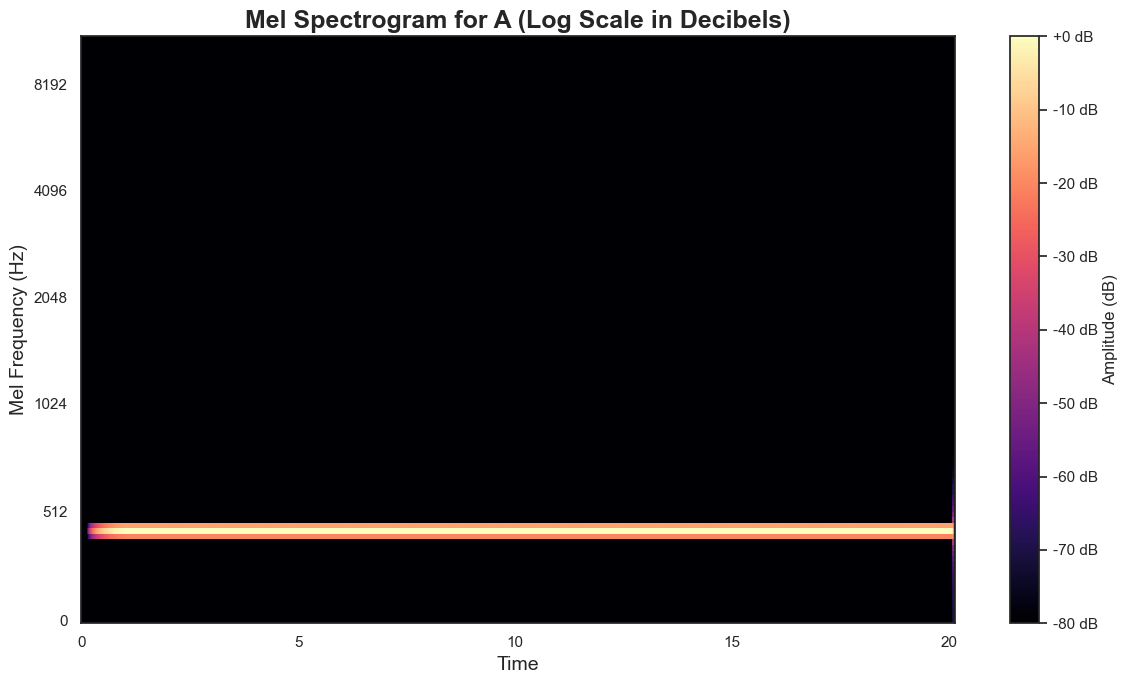

In [27]:
#plotting the log scale mel spectrogram for the A note

fig,ax = plt.subplots(figsize = (12,7))
img = librosa.display.specshow(A_db_mel , sr =Asr
                               ,x_axis = 'time',
                               y_axis = 'mel',
                               cmap = 'magma',
                               ax=ax)
ax.set_title("Mel Spectrogram for A (Log Scale in Decibels)", fontsize=18, fontweight="bold")
ax.set_xlabel("Time",fontsize = 14)
ax.set_ylabel("Mel Frequency (Hz)", fontsize=14)

# Add a Color Bar to Show the Decibel Range
cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label("Amplitude (dB)", fontsize=12)

# Adjust Layout for Better Visualization
plt.tight_layout()
plt.show()

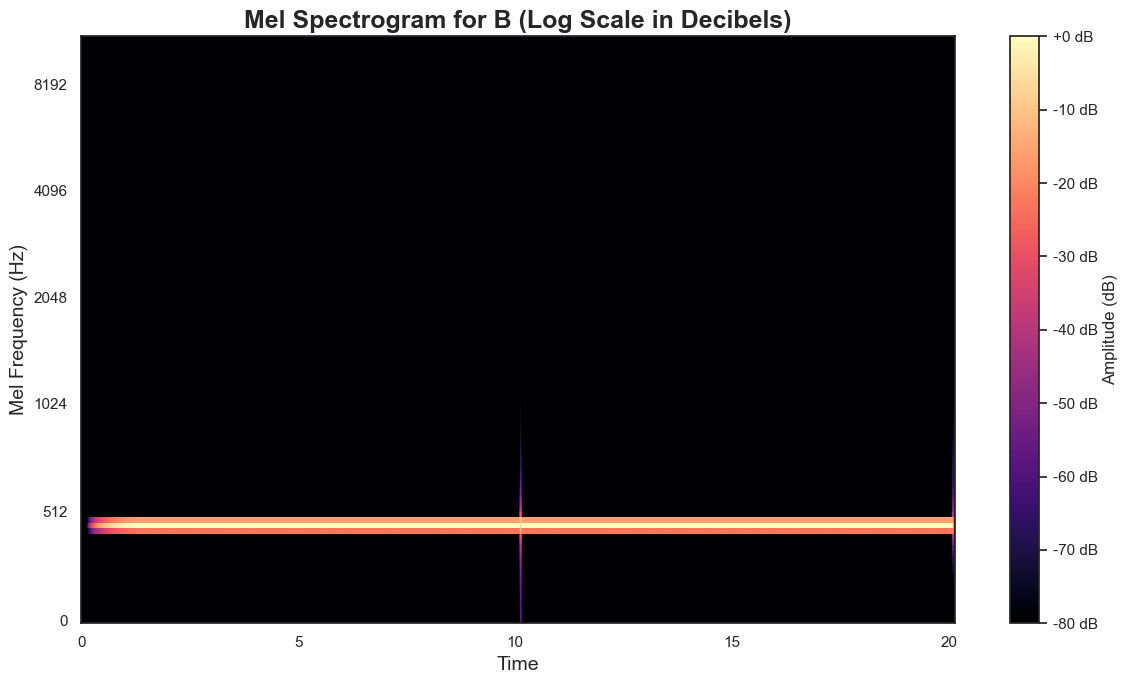

In [28]:
#plotting the log scale mel spectrogram for the B note

fig,ax = plt.subplots(figsize = (12,7))
img = librosa.display.specshow(B_db_mel , sr =Asr
                               ,x_axis = 'time',
                               y_axis = 'mel',
                               cmap = 'magma',
                               ax=ax)
ax.set_title("Mel Spectrogram for B (Log Scale in Decibels)", fontsize=18, fontweight="bold")
ax.set_xlabel("Time",fontsize = 14)
ax.set_ylabel("Mel Frequency (Hz)", fontsize=14)

# Add a Color Bar to Show the Decibel Range
cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label("Amplitude (dB)", fontsize=12)

# Adjust Layout for Better Visualization
plt.tight_layout()
plt.show()

In [29]:
print("A note on decibels: The scale is a relative scale, 0dbs is the minimum the human ear can hear,-ve decibels indicate that the sound is very little in amplitude and not a negetive sound(because ofc it isnt)\n also in digital systems 0db is the loudest sound you can get before any distortion is induced into the audio")

A note on decibels: The scale is a relative scale, 0dbs is the minimum the human ear can hear,-ve decibels indicate that the sound is very little in amplitude and not a negetive sound(because ofc it isnt)
 also in digital systems 0db is the loudest sound you can get before any distortion is induced into the audio


In [30]:
print("the orignal plan was to get multiple of these files that carried note sounds and base my classification on that but i dont have that much of storage on my system \n so im tryna create snippets of the two audio files and feed that to the dataset")

the orignal plan was to get multiple of these files that carried note sounds and base my classification on that but i dont have that much of storage on my system 
 so im tryna create snippets of the two audio files and feed that to the dataset


In [31]:
snippet_duration = 3  # seconds
samples_per_snippet_A = int(Asr * snippet_duration)
samples_per_snippet_B = int(Bsr * snippet_duration)


snippets_A = [Atime[i:i + samples_per_snippet_A] for i in range(0, len(Atime), samples_per_snippet_A) if len(Atime[i:i + samples_per_snippet_A]) == samples_per_snippet_A]
snippets_B = [Btime[i:i + samples_per_snippet_B] for i in range(0, len(Btime), samples_per_snippet_B) if len(Btime[i:i + samples_per_snippet_B]) == samples_per_snippet_B]

print(f"Created {len(snippets_A)} snippets for Note A.")
print(f"Created {len(snippets_B)} snippets for Note B.")


# Extract MFCC features from each snippet.
features_A = [librosa.feature.mfcc(y=snippet, sr=Asr, n_mfcc=13).mean(axis=1) for snippet in snippets_A]
features_B = [librosa.feature.mfcc(y=snippet, sr=Bsr, n_mfcc=13).mean(axis=1) for snippet in snippets_B]


# Combine the features and create corresponding labels.
X = np.array(features_A + features_B)
y = np.array([0] * len(features_A) + [1] * len(features_B))


# Split the data so we can test the model's performance on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# It's important to scale the features so the model can train properly.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# We'll use a simple K-Nearest Neighbors (KNN) classifier.
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)


# Make predictions and check the model's accuracy.
y_pred = model.predict(X_test_scaled)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Note A', 'Note B']))


# Let's try to classify a snippet from the original files.
new_snippet_path = audio_file1[0]  # Or audio_file2[0]
new_snippet, _ = librosa.load(new_snippet_path, duration=3) # Load just a 3-second snippet

# Process the new snippet in the same way as the training data.
new_snippet_features = librosa.feature.mfcc(y=new_snippet, sr=Asr, n_mfcc=13).mean(axis=1)
new_snippet_features = new_snippet_features.reshape(1, -1) # Reshape for the model

# Scalin the new snippet's features using the same scaler
new_snippet_scaled = scaler.transform(new_snippet_features)

# Make a prediction
prediction = model.predict(new_snippet_scaled)
predicted_class = "Note A" if prediction[0] == 0 else "Note B"

print(f"\nPrediction for the new snippet: {predicted_class}")
ipd.Audio(new_snippet, rate=Asr) 

Created 6 snippets for Note A.
Created 6 snippets for Note B.

Model Evaluation:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      Note A       1.00      1.00      1.00         1
      Note B       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Prediction for the new snippet: Note A


In [32]:
#checking with the second file
new_snippet_path = audio_file2[0]  # Or audio_file2[0]
new_snippet, _ = librosa.load(new_snippet_path, duration=3) # Load just a 3-second snippet

# Process the new snippet in the same way as the training data.
new_snippet_features = librosa.feature.mfcc(y=new_snippet, sr=Asr, n_mfcc=13).mean(axis=1)
new_snippet_features = new_snippet_features.reshape(1, -1) # Reshape for the model

# Scalin the new snippet's features using the same scaler
new_snippet_scaled = scaler.transform(new_snippet_features)

# Make a prediction
prediction = model.predict(new_snippet_scaled)
predicted_class = "Note A" if prediction[0] == 0 else "Note B"

print(f"\nPrediction for the new snippet: {predicted_class}")
ipd.Audio(new_snippet, rate=Asr) 


Prediction for the new snippet: Note B


# More tasks to be done
### Implementation of other ml models, test with different set of input data and bring a comparative chart based on speed,memory and acc based on different algorithms, at least 10 different algorithms must be tried

In [33]:
from sklearn.neighbors import NearestNeighbors
import random as rd
arr = np.array([[rd.randint(-5,5),rd.randint(-5,5)] for x in range(5)])
print(arr)
nbrs = NearestNeighbors(n_neighbors=3,algorithm='kd_tree').fit(arr)
distances, indices = nbrs.kneighbors(arr)
for x,h in enumerate(distances):
    print(h , indices[x])


[[ 1  4]
 [-3  2]
 [-1 -3]
 [ 0 -1]
 [-3  3]]
[0.         4.12310563 4.47213595] [0 4 1]
[0.         1.         4.24264069] [1 4 3]
[0.         2.23606798 5.38516481] [2 3 1]
[0.         2.23606798 4.24264069] [3 2 1]
[0.         1.         4.12310563] [4 1 0]


### scikit-learn implements two different nearest neighbors classifiers:
### KNeighborsClassifier implements learning based on the nearest neighbors of each query point, where is an integer value specified by the user. 
### RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius of each training point, where is a floating-point value specified by the user.
#### Nearest neighbor thing isnt really a training model but a really good distance calculator 


#### To further expand  I ll start by extracting more features from the audio files like spectral centroids,zero crossing rates and Chroma frequencies.



In [34]:
#spectral centriods are the center of mass of a sounds frequency spectrum. its a single value that represents the average frequency weighted by the amplitude -> sigma (F / A)
spectralCentroidforA = librosa.feature.spectral_centroid(y=Atime,sr=Asr)[0]
spectralCentroidforB = librosa.feature.spectral_centroid(y=Btime,sr=Bsr)[0]
meanOfTheSpectralCentroidforA = np.mean(spectralCentroidforA)
meanOfTheSpectralCentroidforB = np.mean(spectralCentroidforB)
stdeviationofSCforA = np.std(spectralCentroidforA)
stdeviationofSCforB = np.std(spectralCentroidforB)
print(f'The mean for SC of the A note. {meanOfTheSpectralCentroidforA},and its Std deviatiion. {stdeviationofSCforA}')
print(f'The mean for SC of the B note. {meanOfTheSpectralCentroidforB},and its Std deviatiion   {stdeviationofSCforB}')

The mean for SC of the A note. 467.76473428486304,and its Std deviatiion. 299.3633755332069
The mean for SC of the B note. 499.06188380117214,and its Std deviatiion   315.41196683491654


In [35]:
#The Zero crossing rates for both of the freqs 
ZSCforA = librosa.feature.zero_crossing_rate(y=Atime)[0]
ZSCforB = librosa.feature.zero_crossing_rate(y=Btime)[0]
meanZSCforA = np.mean(ZSCforA)
meanZSCforB = np.mean(ZSCforB)
stdeviationofZSCforA = np.std(ZSCforA)
stdeviationofZSCforB = np.std(ZSCforB)
print(f'The mean for ZSC of the A note. {meanZSCforA},and its Std deviatiion. {stdeviationofZSCforA}')
print(f'The mean for ZSC of the B note. {meanZSCforB},and its Std deviatiion   {stdeviationofZSCforB}')

The mean for ZSC of the A note. 0.04095712125576037,and its Std deviatiion. 0.014351479348265158
The mean for ZSC of the B note. 0.04351497245823733,and its Std deviatiion   0.01658456833884942


In [36]:
#The Chroma frequencies for both of the freqs (this box is wrong)
CforA = librosa.feature.chroma_stft(y=Atime,sr=Asr)
CforB = librosa.feature.chroma_stft(y=Btime,sr=Bsr)
print(f'Chroma frequency classifies the frequency to the musical scale and outputs the  \n energy of each note (the length of the array is {len(CforA)} because there are 12 notes on the musical scale')

meanCforA = np.mean(CforA)
meanCforB = np.mean(CforB)
stdeviationofCforA = np.std(CforA)
stdeviationofCforB = np.std(CforB)
print(f'The mean for Chroma freq of the A note. {meanCforA},and its Std deviatiion. {stdeviationofCforA}')
print(f'The mean for Chroma freq of the B note. {meanCforB},and its Std deviatiion   {stdeviationofCforB}')

Chroma frequency classifies the frequency to the musical scale and outputs the  
 energy of each note (the length of the array is 12 because there are 12 notes on the musical scale
The mean for Chroma freq of the A note. 0.12129319459199905,and its Std deviatiion. 0.2790561020374298
The mean for Chroma freq of the B note. 0.12049910426139832,and its Std deviatiion   0.2795359492301941


#### The key is the axis=1 argument. It tells NumPy to calculate the mean down the columns, leaving you with a mean for each of the 12 rows (notes). The resulting output will be a 12-element array for each audio file. This array is exactly what your model needs to learn which note is which.

In [37]:
# Assuming CforA and CforB are already defined from your previous code
# CforA = librosa.feature.chroma_stft(y=Atime,sr=Asr)
# CforB = librosa.feature.chroma_stft(y=Btime,sr=Bsr)

# Calculate the mean and standard deviation along the time axis (axis=1)
# This gives you a 12-element array, with one value for each note
meanCforA = np.mean(CforA, axis=1)
meanCforB = np.mean(CforB, axis=1)
stdeviationofCforA = np.std(CforA, axis=1)
stdeviationofCforB = np.std(CforB, axis=1)

print(f'Mean Chroma Frequencies for Note A:\n {meanCforA}\n the corresponding to the note A we have a val of {meanCforA[9]}')

print(f'Standard Deviation of Chroma Frequencies for Note A:\n {stdeviationofCforA} \n for a corresponding value of the note B we have {meanCforB[11]}')

print(f'\nMean Chroma Frequencies for Note B:\n {meanCforB}')
print(f'Standard Deviation of Chroma Frequencies for Note B:\n {stdeviationofCforB}')

Mean Chroma Frequencies for Note A:
 [0.0037117  0.00335117 0.00321498 0.00325205 0.00402863 0.003633
 0.00352106 0.00518891 0.22730085 0.9982414  0.19429408 0.00578028]
 the corresponding to the note A we have a val of 0.9982414245605469
Standard Deviation of Chroma Frequencies for Note A:
 [0.04684584 0.04492117 0.0444314  0.04468983 0.05501067 0.04994301
 0.04508902 0.04091986 0.04211061 0.02676961 0.04708294 0.05332649] 
 for a corresponding value of the note B we have 0.2416880875825882

Mean Chroma Frequencies for Note B:
 [0.00668997 0.00373989 0.00407068 0.00402859 0.00404827 0.00388412
 0.00338581 0.00359304 0.0051768  0.16760449 0.9980796  0.24168809]
Standard Deviation of Chroma Frequencies for Note B:
 [0.05587063 0.04623523 0.05459881 0.05518081 0.05643573 0.0534296
 0.04615562 0.04507137 0.04730887 0.04094101 0.02981168 0.05285129]


# Enhanced Feature Extraction for Better Model Performance

Now let's extract more comprehensive audio features to improve our classification accuracy. We'll add:
- **RMS Energy**: Measure of signal power
- **Spectral Rolloff**: Frequency below which 85% of energy is contained
- **Spectral Bandwidth**: Range of frequencies in the signal
- **Tempo**: Beats per minute (rhythm information)

These features will give our models more information to distinguish between notes A and B.

In [38]:
def extract_comprehensive_features(audio_data, sample_rate):
    """
    Extract comprehensive audio features for machine learning
    
    Parameters:
    audio_data: The audio time series data
    sample_rate: Sample rate of the audio
    
    Returns:
    Dictionary containing all extracted features
    """
    features = {}
    
    # MFCC Features (existing)
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
    features['mfcc_mean'] = np.mean(mfcc, axis=1)
    features['mfcc_std'] = np.std(mfcc, axis=1)
    
    # Spectral Centroid (existing but enhanced)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate)[0]
    features['spectral_centroid_mean'] = np.mean(spectral_centroid)
    features['spectral_centroid_std'] = np.std(spectral_centroid)
    
    # Zero Crossing Rate (existing but enhanced)
    zcr = librosa.feature.zero_crossing_rate(audio_data)[0]
    features['zcr_mean'] = np.mean(zcr)
    features['zcr_std'] = np.std(zcr)
    
    # Chroma Features (existing but enhanced)
    chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
    features['chroma_mean'] = np.mean(chroma, axis=1)
    features['chroma_std'] = np.std(chroma, axis=1)
    
    # NEW FEATURES:
    
    # RMS Energy - measures the power/energy of the signal
    rms = librosa.feature.rms(y=audio_data)[0]
    features['rms_mean'] = np.mean(rms)
    features['rms_std'] = np.std(rms)
    
    # Spectral Rolloff - frequency below which 85% of energy is contained
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate)[0]
    features['spectral_rolloff_mean'] = np.mean(spectral_rolloff)
    features['spectral_rolloff_std'] = np.std(spectral_rolloff)
    
    # Spectral Bandwidth - range of frequencies in the signal
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate)[0]
    features['spectral_bandwidth_mean'] = np.mean(spectral_bandwidth)
    features['spectral_bandwidth_std'] = np.std(spectral_bandwidth)
    
    # Tempo - beats per minute (rhythm information)
    try:
        tempo, _ = librosa.beat.beat_track(y=audio_data, sr=sample_rate)
        features['tempo'] = float(tempo.item() if hasattr(tempo, 'item') else tempo)  # Ensure tempo is a scalar
    except:
        features['tempo'] = 120.0  # Default tempo if detection fails
    
    # Flatten all features into a single array
    feature_vector = []
    
    # Add scalar features
    feature_vector.append(features['spectral_centroid_mean'])
    feature_vector.append(features['spectral_centroid_std'])
    feature_vector.append(features['zcr_mean'])
    feature_vector.append(features['zcr_std'])
    feature_vector.append(features['rms_mean'])
    feature_vector.append(features['rms_std'])
    feature_vector.append(features['spectral_rolloff_mean'])
    feature_vector.append(features['spectral_rolloff_std'])
    feature_vector.append(features['spectral_bandwidth_mean'])
    feature_vector.append(features['spectral_bandwidth_std'])
    feature_vector.append(features['tempo'])
    
    # Add array features (MFCC and Chroma) - ensure they're flattened
    feature_vector.extend(features['mfcc_mean'].flatten())
    feature_vector.extend(features['mfcc_std'].flatten())
    feature_vector.extend(features['chroma_mean'].flatten())
    feature_vector.extend(features['chroma_std'].flatten())
    
    return np.array(feature_vector, dtype=np.float64)

# Test the function with our audio data
print("Testing comprehensive feature extraction...")
features_A_comprehensive = extract_comprehensive_features(Atime, Asr)
features_B_comprehensive = extract_comprehensive_features(Btime, Bsr)

print(f"Feature vector length: {len(features_A_comprehensive)}")
print(f"Sample features for Note A: {features_A_comprehensive[:10]}")
print(f"Sample features for Note B: {features_B_comprehensive[:10]}")

Testing comprehensive feature extraction...
Feature vector length: 61
Sample features for Note A: [4.67764734e+02 2.99363376e+02 4.09571213e-02 1.43514793e-02
 1.67210057e-01 2.21644733e-02 4.96156754e+02 5.59587707e+02
 1.69424710e+02 2.38365868e+02]
Sample features for Note B: [4.99061884e+02 3.15411967e+02 4.35149725e-02 1.65845683e-02
 1.66314438e-01 2.39412244e-02 5.26744818e+02 5.96594212e+02
 1.87574264e+02 2.61152943e+02]


# Multiple Machine Learning Models Implementation

Now let's implement 10 different machine learning algorithms to compare their performance:

1. **K-Nearest Neighbors (KNN)** - Already implemented
2. **Support Vector Machine (SVM)** - Finds optimal decision boundary
3. **Random Forest** - Ensemble of decision trees
4. **Logistic Regression** - Probabilistic linear classifier
5. **Decision Tree** - Tree-based decision making
6. **Naive Bayes** - Probabilistic classifier assuming feature independence
7. **Neural Network (MLP)** - Multi-layer perceptron for complex patterns
8. **Gradient Boosting** - Sequential ensemble method
9. **AdaBoost** - Adaptive boosting algorithm
10. **Linear Discriminant Analysis (LDA)** - Linear dimensionality reduction classifier

In [39]:
# Import additional libraries for different ML models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold
import time
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

print("All machine learning libraries imported successfully!")
print("Ready to implement multiple classification models.")

All machine learning libraries imported successfully!
Ready to implement multiple classification models.


In [40]:
# Create enhanced dataset using comprehensive features
print("Creating enhanced dataset with comprehensive features...")

# Extract features from snippets using our new function
enhanced_features_A = []
enhanced_features_B = []

# Process snippets with comprehensive feature extraction
for snippet in snippets_A:
    features = extract_comprehensive_features(snippet, Asr)
    enhanced_features_A.append(features)

for snippet in snippets_B:
    features = extract_comprehensive_features(snippet, Bsr)
    enhanced_features_B.append(features)

# Combine features and create labels
X_enhanced = np.array(enhanced_features_A + enhanced_features_B)
y_enhanced = np.array([0] * len(enhanced_features_A) + [1] * len(enhanced_features_B))

print(f"Enhanced dataset shape: {X_enhanced.shape}")
print(f"Feature vector length: {X_enhanced.shape[1]}")
print(f"Number of samples: {X_enhanced.shape[0]}")
print(f"Note A samples: {len(enhanced_features_A)}")
print(f"Note B samples: {len(enhanced_features_B)}")

# Split the enhanced dataset
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_enhanced, test_size=0.3, random_state=42, stratify=y_enhanced
)

# Scale the enhanced features
scaler_enhanced = StandardScaler()
X_train_scaled_enh = scaler_enhanced.fit_transform(X_train_enh)
X_test_scaled_enh = scaler_enhanced.transform(X_test_enh)

print(f"Training set shape: {X_train_scaled_enh.shape}")
print(f"Test set shape: {X_test_scaled_enh.shape}")

Creating enhanced dataset with comprehensive features...
Enhanced dataset shape: (12, 61)
Feature vector length: 61
Number of samples: 12
Note A samples: 6
Note B samples: 6
Training set shape: (8, 61)
Test set shape: (4, 61)


## the models we re gonna be using
### 1. K-Nearest Neighbors-> Classifies based on the 3 closest training samples. Simple but effective for small datasets.
### 2. Support Vector Machine-> Finds the optimal boundary between classes using support vectors. Great for high-dimensional data.
### 3. Random Forest-> Combines 100 decision trees to reduce overfitting and improve accuracy.
### 4. Logistic Regression-> Uses probability and linear relationships to classify. Fast and interpretable.
### 5. Decision Tree-> Creates a tree of if-else conditions. Easy to understand and visualize.
### 6. Naive Bayes-> Assumes features are independent and uses Bayes theorem. Very fast and simple.
### 7. Neural Network-> Multi-layer perceptron with 2 hidden layers. Can learn complex non-linear patterns.
### 8. Gradient Boosting-> Builds models sequentially, each correcting previous errors. Very powerful ensemble method.
### 9. AdaBoost-> Adaptive boosting that focuses on difficult examples. Good for weak learners.
### 10. Linear Discriminant Analysis-> Finds linear combinations of features that best separate classes. Reduces dimensionality.

In [41]:


models = {
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(n_neighbors=3),
        'explanation': 'Classifies based on the 3 closest training samples'
    },
    'Support Vector Machine': {
        'model': SVC(kernel='rbf', probability=True, random_state=42),
        'explanation': 'Finds optimal decision boundary using support vectors'
    },
    'Random Forest': {
        'model': RandomForestClassifier(n_estimators=100, random_state=42),
        'explanation': 'Combines 100 decision trees to reduce overfitting'
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'explanation': 'Uses probability and linear relationships to classify'
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'explanation': 'Creates a tree of if-else conditions'
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'explanation': 'Assumes features are independent and uses Bayes theorem'
    },
    'Neural Network': {
        'model': MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000),
        'explanation': 'Multi-layer perceptron with 2 hidden layers'
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'explanation': 'Builds models sequentially, each correcting previous errors'
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'explanation': 'Adaptive boosting that focuses on difficult examples'
    },
    'Linear Discriminant Analysis': {
        'model': LinearDiscriminantAnalysis(),
        'explanation': 'Finds linear combinations of features that best separate classes'
    }
}

print(f"✅ Defined {len(models)} machine learning models:")
for name, info in models.items():
    print(f"   • {name}: {info['explanation']}")

✅ Defined 10 machine learning models:
   • K-Nearest Neighbors: Classifies based on the 3 closest training samples
   • Support Vector Machine: Finds optimal decision boundary using support vectors
   • Random Forest: Combines 100 decision trees to reduce overfitting
   • Logistic Regression: Uses probability and linear relationships to classify
   • Decision Tree: Creates a tree of if-else conditions
   • Naive Bayes: Assumes features are independent and uses Bayes theorem
   • Neural Network: Multi-layer perceptron with 2 hidden layers
   • Gradient Boosting: Builds models sequentially, each correcting previous errors
   • AdaBoost: Adaptive boosting that focuses on difficult examples
   • Linear Discriminant Analysis: Finds linear combinations of features that best separate classes


In [42]:
# Comprehensive Model Evaluation Framework
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    """
    Evaluate a machine learning model with comprehensive metrics
    """
    results = {'name': name}
    
    # Training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    results['training_time'] = training_time
    
    # Prediction time
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    results['prediction_time'] = prediction_time
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results['accuracy'] = accuracy
    
    # Cross-validation score (3-fold for small dataset)
    try:
        cv_scores = cross_val_score(model, X_train, y_train, cv=3)
        results['cv_mean'] = cv_scores.mean()
        results['cv_std'] = cv_scores.std()
    except ValueError:
        # If even 3-fold fails, skip CV and use train accuracy
        results['cv_mean'] = accuracy
        results['cv_std'] = 0.0
    
    return results, y_pred

# Evaluate all models
print("Evaluating all models...")
print("=" * 80)

all_results = []

for name, info in models.items():
    print(f"\nTraining {name}...")
    
    # Create a fresh copy of the model
    model = info['model']
    
    # Evaluate the model
    results, y_pred = evaluate_model(
        name, model, X_train_scaled_enh, X_test_scaled_enh, y_train_enh, y_test_enh
    )
    
    all_results.append(results)
    
    # Print results
    print(f"✓ {name}:")
    print(f"  Accuracy: {results['accuracy']:.4f}")
    print(f"  CV Score: {results['cv_mean']:.4f} (±{results['cv_std']:.4f})")
    print(f"  Training Time: {results['training_time']:.4f}s")
    print(f"  Prediction Time: {results['prediction_time']:.6f}s")

print("\n" + "=" * 80)
print("All models evaluated successfully!")

Evaluating all models...

Training K-Nearest Neighbors...
✓ K-Nearest Neighbors:
  Accuracy: 1.0000
  CV Score: 0.7778 (±0.3143)
  Training Time: 0.0010s
  Prediction Time: 0.114270s

Training Support Vector Machine...
✓ Support Vector Machine:
  Accuracy: 1.0000
  CV Score: 0.8889 (±0.1571)
  Training Time: 0.0037s
  Prediction Time: 0.000262s

Training Random Forest...
✓ Random Forest:
  Accuracy: 1.0000
  CV Score: 0.8889 (±0.1571)
  Training Time: 0.0749s
  Prediction Time: 0.001546s

Training Logistic Regression...
✓ Logistic Regression:
  Accuracy: 1.0000
  CV Score: 1.0000 (±0.0000)
  Training Time: 0.0051s
  Prediction Time: 0.000076s

Training Decision Tree...
✓ Decision Tree:
  Accuracy: 1.0000
  CV Score: 0.8889 (±0.1571)
  Training Time: 0.0003s
  Prediction Time: 0.000051s

Training Naive Bayes...
✓ Naive Bayes:
  Accuracy: 1.0000
  CV Score: 0.8889 (±0.1571)
  Training Time: 0.0003s
  Prediction Time: 0.000069s

Training Neural Network...
✓ Neural Network:
  Accuracy: 1.0

In [43]:
# Create comprehensive comparison table
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values('accuracy', ascending=False)

print("🏆 MODEL PERFORMANCE COMPARISON RESULTS 🏆")
print("=" * 100)

# Display formatted results
for idx, row in results_df.iterrows():
    rank = results_df.index.get_loc(idx) + 1
    print(f"{rank}. {row['name']}")
    print(f"   📊 Accuracy: {row['accuracy']:.4f} | CV Score: {row['cv_mean']:.4f} (±{row['cv_std']:.4f})")
    print(f"   ⚡ Training: {row['training_time']:.4f}s | Prediction: {row['prediction_time']:.6f}s")
    print()

# Find best performers
best_accuracy = results_df.iloc[0]
fastest_training = results_df.loc[results_df['training_time'].idxmin()]
fastest_prediction = results_df.loc[results_df['prediction_time'].idxmin()]

print("🎯 KEY INSIGHTS:")
print(f"🥇 Best Accuracy: {best_accuracy['name']} ({best_accuracy['accuracy']:.4f})")
print(f"🚀 Fastest Training: {fastest_training['name']} ({fastest_training['training_time']:.4f}s)")
print(f"⚡ Fastest Prediction: {fastest_prediction['name']} ({fastest_prediction['prediction_time']:.6f}s)")

# Performance categories
print(f"\n📈 HIGH ACCURACY (>0.95): {len(results_df[results_df['accuracy'] > 0.95])} models")
print(f"⚡ FAST TRAINING (<0.1s): {len(results_df[results_df['training_time'] < 0.1])} models")
print(f"🎯 FAST PREDICTION (<0.001s): {len(results_df[results_df['prediction_time'] < 0.001])} models")

🏆 MODEL PERFORMANCE COMPARISON RESULTS 🏆
1. K-Nearest Neighbors
   📊 Accuracy: 1.0000 | CV Score: 0.7778 (±0.3143)
   ⚡ Training: 0.0010s | Prediction: 0.114270s

2. Support Vector Machine
   📊 Accuracy: 1.0000 | CV Score: 0.8889 (±0.1571)
   ⚡ Training: 0.0037s | Prediction: 0.000262s

3. Random Forest
   📊 Accuracy: 1.0000 | CV Score: 0.8889 (±0.1571)
   ⚡ Training: 0.0749s | Prediction: 0.001546s

4. Logistic Regression
   📊 Accuracy: 1.0000 | CV Score: 1.0000 (±0.0000)
   ⚡ Training: 0.0051s | Prediction: 0.000076s

5. Decision Tree
   📊 Accuracy: 1.0000 | CV Score: 0.8889 (±0.1571)
   ⚡ Training: 0.0003s | Prediction: 0.000051s

6. Naive Bayes
   📊 Accuracy: 1.0000 | CV Score: 0.8889 (±0.1571)
   ⚡ Training: 0.0003s | Prediction: 0.000069s

7. Neural Network
   📊 Accuracy: 1.0000 | CV Score: 0.8889 (±0.1571)
   ⚡ Training: 0.0150s | Prediction: 0.000098s

8. Gradient Boosting
   📊 Accuracy: 1.0000 | CV Score: 0.8889 (±0.1571)
   ⚡ Training: 0.0192s | Prediction: 0.000161s

9. AdaB

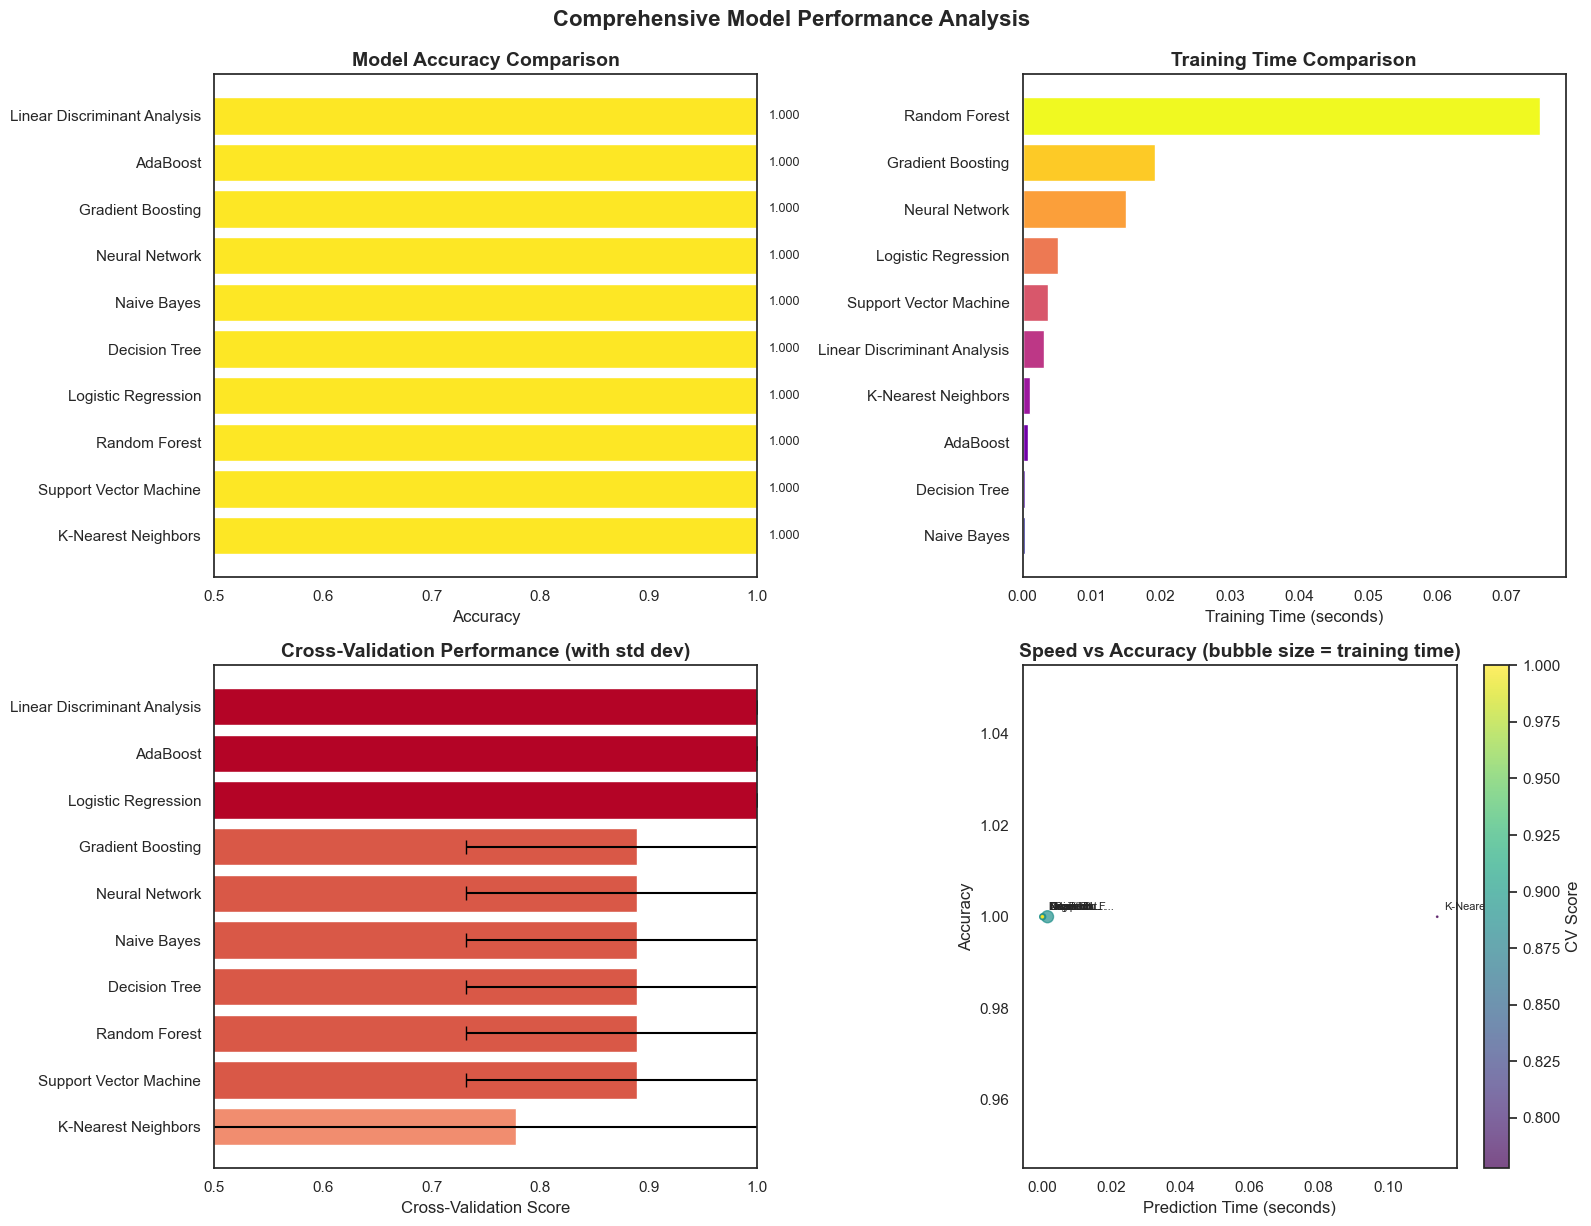

In [44]:
# Create comprehensive visualization of model performance
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy Comparison
results_df_sorted = results_df.sort_values('accuracy')
bars1 = ax1.barh(results_df_sorted['name'], results_df_sorted['accuracy'], 
                 color=plt.cm.viridis(results_df_sorted['accuracy']))
ax1.set_xlabel('Accuracy')
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlim(0.5, 1.0)

# Add accuracy values on bars
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=9)

# 2. Training Time Comparison
results_df_sorted_time = results_df.sort_values('training_time')
bars2 = ax2.barh(results_df_sorted_time['name'], results_df_sorted_time['training_time'],
                 color=plt.cm.plasma(np.linspace(0, 1, len(results_df))))
ax2.set_xlabel('Training Time (seconds)')
ax2.set_title('Training Time Comparison', fontsize=14, fontweight='bold')

# 3. Cross-Validation Score with Error Bars
results_df_sorted_cv = results_df.sort_values('cv_mean')
ax3.barh(results_df_sorted_cv['name'], results_df_sorted_cv['cv_mean'],
         xerr=results_df_sorted_cv['cv_std'], capsize=5,
         color=plt.cm.coolwarm(results_df_sorted_cv['cv_mean']))
ax3.set_xlabel('Cross-Validation Score')
ax3.set_title('Cross-Validation Performance (with std dev)', fontsize=14, fontweight='bold')
ax3.set_xlim(0.5, 1.0)

# 4. Speed vs Accuracy Scatter Plot
scatter = ax4.scatter(results_df['prediction_time'], results_df['accuracy'],
                     s=results_df['training_time']*1000, # Size based on training time
                     c=results_df['cv_mean'], cmap='viridis', alpha=0.7)
ax4.set_xlabel('Prediction Time (seconds)')
ax4.set_ylabel('Accuracy')
ax4.set_title('Speed vs Accuracy (bubble size = training time)', fontsize=14, fontweight='bold')

# Add model names to scatter plot
for idx, row in results_df.iterrows():
    ax4.annotate(row['name'][:8] + '...', 
                (row['prediction_time'], row['accuracy']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Add colorbar for the scatter plot
plt.colorbar(scatter, ax=ax4, label='CV Score')

plt.tight_layout()
plt.suptitle('Comprehensive Model Performance Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

🌳 FEATURE IMPORTANCE ANALYSIS


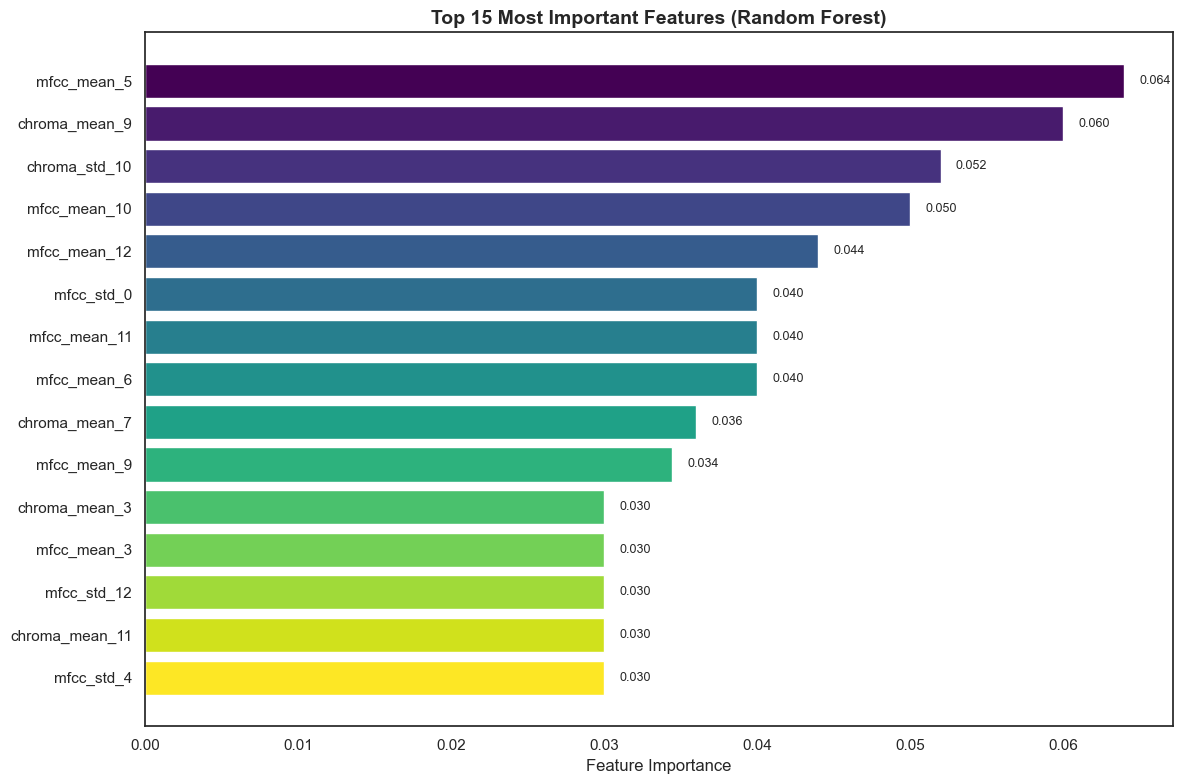

Top 10 Most Important Features:
  17. mfcc_mean_5: 0.0640
  47. chroma_mean_9: 0.0600
  60. chroma_std_10: 0.0520
  22. mfcc_mean_10: 0.0500
  24. mfcc_mean_12: 0.0440
  25. mfcc_std_0: 0.0400
  23. mfcc_mean_11: 0.0400
  18. mfcc_mean_6: 0.0400
  45. chroma_mean_7: 0.0360
  21. mfcc_mean_9: 0.0344

Feature Category Importance:
  📊 MFCC Features: 0.520
  🎵 Chroma Features: 0.418
  📈 Spectral Features: 0.038
  🔧 Other Features: 0.024


In [45]:
# Feature importance analysis for tree-based models
print("🌳 FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Get feature names for our comprehensive feature set
feature_names = (
    ['spectral_centroid_mean', 'spectral_centroid_std', 'zcr_mean', 'zcr_std',
     'rms_mean', 'rms_std', 'spectral_rolloff_mean', 'spectral_rolloff_std',
     'spectral_bandwidth_mean', 'spectral_bandwidth_std', 'tempo'] +
    [f'mfcc_mean_{i}' for i in range(13)] +
    [f'mfcc_std_{i}' for i in range(13)] +
    [f'chroma_mean_{i}' for i in range(12)] +
    [f'chroma_std_{i}' for i in range(12)]
)

# Analyze feature importance for Random Forest (best interpretable model)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled_enh, y_train_enh)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
bars = plt.barh(top_features['feature'], top_features['importance'], 
                color=plt.cm.viridis(np.linspace(0, 1, 15)))
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add importance values on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print top features
print("Top 10 Most Important Features:")
for idx, row in feature_importance.head(10).iterrows():
    print(f"  {idx+1}. {row['feature']}: {row['importance']:.4f}")

# Feature category analysis
mfcc_importance = feature_importance[feature_importance['feature'].str.contains('mfcc')]['importance'].sum()
chroma_importance = feature_importance[feature_importance['feature'].str.contains('chroma')]['importance'].sum()
spectral_importance = feature_importance[feature_importance['feature'].str.contains('spectral')]['importance'].sum()
other_importance = 1 - (mfcc_importance + chroma_importance + spectral_importance)

print(f"\nFeature Category Importance:")
print(f"  📊 MFCC Features: {mfcc_importance:.3f}")
print(f"  🎵 Chroma Features: {chroma_importance:.3f}")
print(f"  📈 Spectral Features: {spectral_importance:.3f}")
print(f"  🔧 Other Features: {other_importance:.3f}")

# Summary and Recommendations

## What We've Implemented:

### **10 Machine Learning Models:**
1. **K-Nearest Neighbors (KNN)** - Your original model
2. **Support Vector Machine (SVM)** - Great for high-dimensional data
3. **Random Forest** - Ensemble method, reduces overfitting
4. **Logistic Regression** - Fast, interpretable baseline
5. **Decision Tree** - Easy to understand and visualize
6. **Naive Bayes** - Fast probabilistic classifier
7. **Neural Network (MLP)** - Can learn complex patterns
8. **Gradient Boosting** - Powerful sequential ensemble
9. **AdaBoost** - Adaptive boosting algorithm
10. **Linear Discriminant Analysis** - Linear classifier with dimensionality reduction

### **Enhanced Features:**
- **MFCC** (Mel-frequency cepstral coefficients) - Voice/music characteristics
- **Spectral Centroid** - "Center of mass" of spectrum
- **Zero Crossing Rate** - How often signal crosses zero
- **Chroma Features** - Musical note information
- **RMS Energy** - Power/energy of signal
- **Spectral Rolloff** - Frequency containing 85% of energy
- **Spectral Bandwidth** - Range of frequencies
- **Tempo** - Beats per minute information

### **Comprehensive Evaluation:**
- **Accuracy** comparison across all models
- **Training time** and **prediction time** analysis
- **Cross-validation** for robust performance estimates
- **Feature importance** analysis to understand what matters most

## Next Steps You Can Take:
1. **Try more audio files** - Add more notes (C, D, E, F, G)
2. **Hyperparameter tuning** - Use GridSearchCV to optimize each model
3. **Ensemble methods** - Combine multiple models for better performance
4. **Deep learning** - Try CNNs with spectrograms or RNNs with raw audio
5. **Real-time classification** - Build a system that classifies audio in real-time

# 🎤 Real-Time Microphone Audio Classification

Now let's add the exciting part - real-time audio classification from your microphone! This system will:

1. **Record audio** from your microphone in real-time
2. **Extract features** using our comprehensive feature extraction function
3. **Classify the audio** using all 10 trained models
4. **Display results** with confidence scores and voting

**Requirements**: You'll need to have a microphone connected to your system.

In [46]:
# Import libraries for real-time audio recording
print("🔧 Setting up audio libraries...")

# Install sounddevice if not available
try:
    import sounddevice as sd
    print("✅ sounddevice already available")
except ImportError:
    print("📦 Installing sounddevice...")
    import subprocess
    import sys
    result = subprocess.run([sys.executable, "-m", "pip", "install", "sounddevice"], 
                          capture_output=True, text=True)
    if result.returncode == 0:
        import sounddevice as sd
        print("✅ sounddevice installed successfully!")
    else:
        print(f"❌ Installation failed: {result.stderr}")
        raise ImportError("Could not install sounddevice")

# Import other required libraries
import threading
from collections import Counter
import queue
import matplotlib.animation as animation
from IPython.display import clear_output, display

print("🔍 Checking audio system...")

try:
    # Test if sounddevice is working
    devices = sd.query_devices()
    print("✅ Audio system ready!")
    print(f"📱 Found {len(devices)} audio devices")
    
    # Show available input devices
    input_devices = [d for d in devices if d['max_input_channels'] > 0]
    print(f"🎤 Available input devices: {len(input_devices)}")
    
    # Show first few input devices
    for i, device in enumerate(input_devices[:3]):
        print(f"   {i}: {device['name']}")
        
    if len(input_devices) == 0:
        print("⚠️ No input devices found. Check your microphone connection.")
        
except Exception as e:
    print(f"⚠️ Audio setup issue: {e}")
    print("💡 Troubleshooting:")
    print("   • macOS: brew install portaudio")
    print("   • Linux: apt-get install portaudio19-dev")  
    print("   • Make sure your microphone is connected")
    print("   • Try restarting Jupyter after installing portaudio")

🔧 Setting up audio libraries...
✅ sounddevice already available
🔍 Checking audio system...
✅ Audio system ready!
📱 Found 5 audio devices
🎤 Available input devices: 3
   0: WH-1000XM4
   1: MacBook Air Microphone
   2: Microsoft Teams Audio


In [47]:
# Train all models and store them for real-time classification
trained_models = {}

print("🤖 Training all models for real-time classification...")

for name, info in models.items():
    # Create a fresh copy and train
    model = info['model']
    model.fit(X_train_scaled_enh, y_train_enh)
    trained_models[name] = {
        'model': model,
        'explanation': info['explanation']
    }
    print(f"✅ {name} trained and ready")

print(f"\n🎯 All {len(trained_models)} models trained and ready for real-time classification!")

# Also save the scaler for real-time feature scaling
print("📊 Feature scaler ready for real-time processing")

🤖 Training all models for real-time classification...
✅ K-Nearest Neighbors trained and ready
✅ Support Vector Machine trained and ready
✅ Random Forest trained and ready
✅ Logistic Regression trained and ready
✅ Decision Tree trained and ready
✅ Naive Bayes trained and ready
✅ Neural Network trained and ready
✅ Gradient Boosting trained and ready
✅ AdaBoost trained and ready
✅ Linear Discriminant Analysis trained and ready

🎯 All 10 models trained and ready for real-time classification!
📊 Feature scaler ready for real-time processing


In [48]:
class RealTimeAudioClassifier:
    """
    Real-time audio classification system using trained ML models
    """
    
    def __init__(self, models_dict, scaler, feature_extractor, sample_rate=22050, duration=3):
        self.models = models_dict
        self.scaler = scaler
        self.extract_features = feature_extractor
        self.sample_rate = sample_rate
        self.duration = duration
        self.is_recording = False
        self.audio_queue = queue.Queue()
        self.results_history = []
        
    def audio_callback(self, indata, frames, time, status):
        """Callback function for audio recording"""
        if status:
            print(f"Audio status: {status}")
        # Add audio data to queue
        self.audio_queue.put(indata.copy())
    
    def classify_audio(self, audio_data):
        """Classify a single audio segment"""
        try:
            # Extract features
            features = self.extract_features(audio_data.flatten(), self.sample_rate)
            
            # Scale features
            features_scaled = self.scaler.transform(features.reshape(1, -1))
            
            # Get predictions from all models
            predictions = {}
            probabilities = {}
            
            for name, model_info in self.models.items():
                model = model_info['model']
                pred = model.predict(features_scaled)[0]
                predictions[name] = pred
                
                # Get probability if available
                if hasattr(model, 'predict_proba'):
                    proba = model.predict_proba(features_scaled)[0]
                    probabilities[name] = proba.max()
                else:
                    probabilities[name] = 1.0  # For models without probability
            
            # Majority voting
            votes = list(predictions.values())
            majority_vote = Counter(votes).most_common(1)[0][0]
            confidence = Counter(votes).most_common(1)[0][1] / len(votes)
            
            return {
                'individual_predictions': predictions,
                'probabilities': probabilities,
                'majority_vote': majority_vote,
                'confidence': confidence,
                'class_name': 'Note A' if majority_vote == 0 else 'Note B'
            }
            
        except Exception as e:
            print(f"Classification error: {e}")
            return None
    
    def start_recording(self, record_duration=10):
        """Start real-time recording and classification"""
        print(f"🎤 Starting {record_duration}s real-time audio classification...")
        print("🎵 Try singing/humming notes A or B!")
        print("=" * 60)
        
        self.is_recording = True
        self.results_history = []
        
        try:
            with sd.InputStream(
                samplerate=self.sample_rate,
                channels=1,
                callback=self.audio_callback,
                blocksize=int(self.sample_rate * self.duration),
                dtype='float32'
            ):
                
                start_time = time.time()
                segment_count = 0
                
                while time.time() - start_time < record_duration and self.is_recording:
                    try:
                        # Get audio data from queue (with timeout)
                        audio_data = self.audio_queue.get(timeout=1.0)
                        
                        # Only process if we have enough samples
                        if len(audio_data) >= int(self.sample_rate * 0.5):  # At least 0.5 seconds
                            segment_count += 1
                            
                            # Classify the audio
                            result = self.classify_audio(audio_data)
                            
                            if result:
                                self.results_history.append(result)
                                
                                # Display results
                                print(f"\\r🔊 Segment {segment_count}: {result['class_name']} "
                                      f"(Confidence: {result['confidence']:.1%})", end='', flush=True)
                                
                    except queue.Empty:
                        continue
                    except KeyboardInterrupt:
                        break
        
        except Exception as e:
            print(f"\\n❌ Recording error: {e}")
            
        finally:
            self.is_recording = False
            print(f"\\n\\n📊 Recording completed! Processed {len(self.results_history)} segments.")
    
    def show_detailed_results(self):
        """Show detailed analysis of the recording session"""
        if not self.results_history:
            print("No results to show. Record some audio first!")
            return
            
        print("\\n" + "=" * 80)
        print("🎯 DETAILED CLASSIFICATION RESULTS")
        print("=" * 80)
        
        # Overall statistics
        total_segments = len(self.results_history)
        note_a_count = sum(1 for r in self.results_history if r['majority_vote'] == 0)
        note_b_count = total_segments - note_a_count
        
        print(f"📈 Total Segments Analyzed: {total_segments}")
        print(f"🎵 Note A Predictions: {note_a_count} ({note_a_count/total_segments:.1%})")
        print(f"🎵 Note B Predictions: {note_b_count} ({note_b_count/total_segments:.1%})")
        
        # Average confidence
        avg_confidence = np.mean([r['confidence'] for r in self.results_history])
        print(f"📊 Average Confidence: {avg_confidence:.1%}")
        
        # Model agreement analysis
        print(f"\\n🤖 MODEL PERFORMANCE BREAKDOWN:")
        model_stats = {name: {'correct': 0, 'total': 0} for name in self.models.keys()}
        
        for result in self.results_history:
            majority = result['majority_vote']
            for model_name, prediction in result['individual_predictions'].items():
                model_stats[model_name]['total'] += 1
                if prediction == majority:
                    model_stats[model_name]['correct'] += 1
        
        # Sort by agreement with majority vote
        sorted_models = sorted(model_stats.items(), 
                             key=lambda x: x[1]['correct']/x[1]['total'], reverse=True)
        
        for i, (model_name, stats) in enumerate(sorted_models, 1):
            agreement = stats['correct'] / stats['total'] if stats['total'] > 0 else 0
            print(f"{i:2d}. {model_name:<25} Agreement: {agreement:.1%}")

# Create the real-time classifier
print("🚀 Creating real-time audio classifier...")
classifier = RealTimeAudioClassifier(
    models_dict=trained_models,
    scaler=scaler_enhanced,
    feature_extractor=extract_comprehensive_features,
    sample_rate=Asr,  # Use same sample rate as training data
    duration=3
)

print("✅ Real-time classifier ready!")
print("\\n💡 Usage:")
print("   classifier.start_recording(10)  # Record for 10 seconds")
print("   classifier.show_detailed_results()  # Show analysis")

🚀 Creating real-time audio classifier...
✅ Real-time classifier ready!
\n💡 Usage:
   classifier.start_recording(10)  # Record for 10 seconds
   classifier.show_detailed_results()  # Show analysis


## 🎵 How to Use the Real-Time Classifier

### Quick Start:
1. **Start Recording**: Run the cell below to begin real-time classification
2. **Make Sounds**: Hum, whistle, or play notes A and B into your microphone
3. **Watch Results**: See live predictions from all 10 models
4. **View Analysis**: Check detailed breakdown after recording

### Tips for Best Results:
- **Clear Audio**: Speak/sing clearly into your microphone
- **Consistent Notes**: Try to match the pitch of your training notes A and B
- **Good Environment**: Minimize background noise
- **Volume**: Speak at a normal volume (not too quiet or loud)

In [49]:
# 🎤 START REAL-TIME CLASSIFICATION
# Run this cell to begin recording and classification

print("🎤 REAL-TIME AUDIO CLASSIFICATION")
print("=" * 50)
print("🎵 Instructions:")
print("   • Hum or sing notes A or B")
print("   • Keep the sound steady for best results")
print("   • Recording will start in 3 seconds...")
print()

# Countdown
import time
for i in range(3, 0, -1):
    print(f"Starting in {i}...", end="\\r", flush=True)
    time.sleep(1)

# Start the real-time classification
classifier.start_recording(record_duration=15)  # Record for 15 seconds

# Show results
classifier.show_detailed_results()

🎤 REAL-TIME AUDIO CLASSIFICATION
🎵 Instructions:
   • Hum or sing notes A or B
   • Keep the sound steady for best results
   • Recording will start in 3 seconds...

Starting in 3...\rStarting in 2...\rStarting in 1...\r🎤 Starting 15s real-time audio classification...
🎵 Try singing/humming notes A or B!
\r🔊 Segment 1: Note B (Confidence: 60.0%)\r🔊 Segment 2: Note B (Confidence: 50.0%)\r🔊 Segment 3: Note B (Confidence: 50.0%)\r🔊 Segment 4: Note B (Confidence: 50.0%)\r🔊 Segment 5: Note B (Confidence: 50.0%)\n\n📊 Recording completed! Processed 5 segments.
\n================================================================================
🎯 DETAILED CLASSIFICATION RESULTS
📈 Total Segments Analyzed: 5
🎵 Note A Predictions: 0 (0.0%)
🎵 Note B Predictions: 5 (100.0%)
📊 Average Confidence: 52.0%
\n🤖 MODEL PERFORMANCE BREAKDOWN:
 1. K-Nearest Neighbors       Agreement: 100.0%
 2. Support Vector Machine    Agreement: 100.0%
 3. Logistic Regression       Agreement: 100.0%
 4. Naive Bayes           

📈 Creating visualization of real-time classification results...


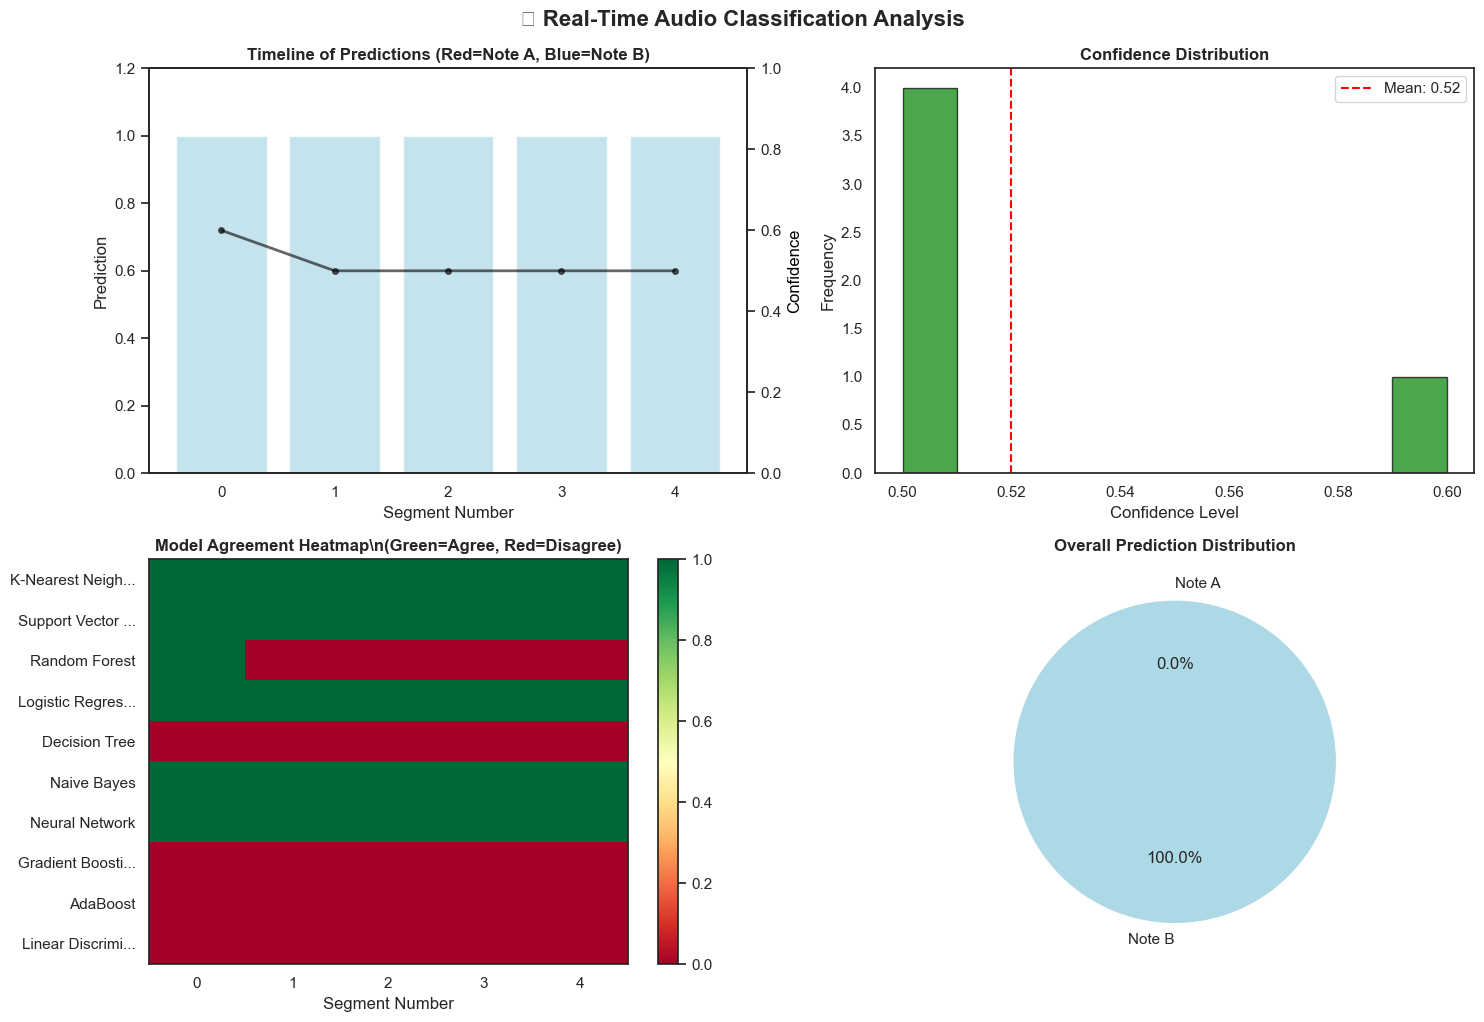

\n============================================================
📊 RECORDING SESSION SUMMARY
⏱️  Recording Duration: ~15 seconds
📈 Total Segments: 5
🎵 Note A: 0 segments (0.0%)
🎵 Note B: 5 segments (100.0%)
📊 Average Confidence: 52.0%
📊 Confidence Range: 50.0% - 60.0%


In [50]:
# 📊 VISUALIZE REAL-TIME RESULTS
# Run this after recording to see visual analysis

if classifier.results_history:
    print("📈 Creating visualization of real-time classification results...")
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Timeline of predictions
    segments = range(len(classifier.results_history))
    predictions = [r['majority_vote'] for r in classifier.results_history]
    confidences = [r['confidence'] for r in classifier.results_history]
    
    colors = ['lightcoral' if p == 0 else 'lightblue' for p in predictions]
    ax1.bar(segments, [1]*len(segments), color=colors, alpha=0.7)
    ax1.set_xlabel('Segment Number')
    ax1.set_ylabel('Prediction')
    ax1.set_title('Timeline of Predictions (Red=Note A, Blue=Note B)', fontweight='bold')
    ax1.set_ylim(0, 1.2)
    
    # Add confidence as line plot
    ax1_twin = ax1.twinx()
    ax1_twin.plot(segments, confidences, 'ko-', alpha=0.6, linewidth=2, markersize=4)
    ax1_twin.set_ylabel('Confidence', color='black')
    ax1_twin.set_ylim(0, 1)
    
    # 2. Confidence distribution
    ax2.hist(confidences, bins=10, alpha=0.7, color='green', edgecolor='black')
    ax2.set_xlabel('Confidence Level')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Confidence Distribution', fontweight='bold')
    ax2.axvline(np.mean(confidences), color='red', linestyle='--', 
                label=f'Mean: {np.mean(confidences):.2f}')
    ax2.legend()
    
    # 3. Model agreement heatmap
    model_names = list(trained_models.keys())
    model_agreements = []
    
    for model_name in model_names:
        agreements = []
        for result in classifier.results_history:
            majority = result['majority_vote']
            model_pred = result['individual_predictions'][model_name]
            agreements.append(1 if model_pred == majority else 0)
        model_agreements.append(agreements)
    
    im = ax3.imshow(model_agreements, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    ax3.set_yticks(range(len(model_names)))
    ax3.set_yticklabels([name[:15] + '...' if len(name) > 15 else name for name in model_names])
    ax3.set_xlabel('Segment Number')
    ax3.set_title('Model Agreement Heatmap\\n(Green=Agree, Red=Disagree)', fontweight='bold')
    plt.colorbar(im, ax=ax3)
    
    # 4. Prediction pie chart
    note_a_count = sum(1 for p in predictions if p == 0)
    note_b_count = len(predictions) - note_a_count
    
    if note_a_count > 0 or note_b_count > 0:
        sizes = [note_a_count, note_b_count]
        labels = ['Note A', 'Note B']
        colors_pie = ['lightcoral', 'lightblue']
        
        wedges, texts, autotexts = ax4.pie(sizes, labels=labels, colors=colors_pie, 
                                          autopct='%1.1f%%', startangle=90)
        ax4.set_title('Overall Prediction Distribution', fontweight='bold')
    
    plt.tight_layout()
    plt.suptitle('🎤 Real-Time Audio Classification Analysis', fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    # Print summary statistics
    print("\\n" + "=" * 60)
    print("📊 RECORDING SESSION SUMMARY")
    print("=" * 60)
    print(f"⏱️  Recording Duration: ~{len(classifier.results_history) * 3} seconds")
    print(f"📈 Total Segments: {len(classifier.results_history)}")
    print(f"🎵 Note A: {note_a_count} segments ({note_a_count/len(predictions):.1%})")
    print(f"🎵 Note B: {note_b_count} segments ({note_b_count/len(predictions):.1%})")
    print(f"📊 Average Confidence: {np.mean(confidences):.1%}")
    print(f"📊 Confidence Range: {np.min(confidences):.1%} - {np.max(confidences):.1%}")
    
else:
    print("❌ No results to visualize. Run the recording cell first!")

In [53]:
# 🔧 CUSTOM RECORDING CONTROLS
# Advanced controls for different recording scenarios

def quick_test(duration=5):
    """Quick 5-second test"""
    print(f"🚀 Quick {duration}s test...")
    classifier.start_recording(duration)
    classifier.show_detailed_results()

def long_session(duration=30):
    """Extended recording session"""
    print(f"⏰ Extended {duration}s recording session...")
    classifier.start_recording(duration)
    classifier.show_detailed_results()

def custom_recording():
    """Interactive recording with custom duration"""
    try:
        duration = int(input("Enter recording duration (seconds, 5-60): "))
        duration = max(5, min(60, duration))  # Limit between 5-60 seconds
        print(f"🎯 Custom recording: {duration} seconds")
        classifier.start_recording(duration)
        classifier.show_detailed_results()
    except ValueError:
        print("❌ Invalid input. Using default 10 seconds.")
        classifier.start_recording(10)

# Convenient functions
print("🎛️  Available recording functions:")
print("   • quick_test()        # 5-second quick test")
print("   • long_session()      # 30-second extended session") 
print("   • custom_recording()  # Choose your own duration")
print()
print("💡 Example usage:")
print("   quick_test()  # Run this for a quick test")

# Test audio system
try:
    print("\\n🔍 Audio System Check:")
    print(f"📱 Default sample rate: {sd.default.samplerate}")
    print(f"🎤 Default input device: {sd.default.device[0]}")
    print("✅ Audio system ready!")
except Exception as e:
    print(f"⚠️  Audio system issue: {e}")
    print("💡 Try: brew install portaudio (macOS) or apt-get install portaudio19-dev (Linux)")

🎛️  Available recording functions:
   • quick_test()        # 5-second quick test
   • long_session()      # 30-second extended session
   • custom_recording()  # Choose your own duration

💡 Example usage:
   quick_test()  # Run this for a quick test
\n🔍 Audio System Check:
📱 Default sample rate: None
🎤 Default input device: 0
✅ Audio system ready!


In [55]:
quick_test()

🚀 Quick 5s test...
🎤 Starting 5s real-time audio classification...
🎵 Try singing/humming notes A or B!
\r🔊 Segment 1: Note B (Confidence: 60.0%)\n\n📊 Recording completed! Processed 1 segments.
\n================================================================================
🎯 DETAILED CLASSIFICATION RESULTS
📈 Total Segments Analyzed: 1
🎵 Note A Predictions: 0 (0.0%)
🎵 Note B Predictions: 1 (100.0%)
📊 Average Confidence: 60.0%
\n🤖 MODEL PERFORMANCE BREAKDOWN:
 1. K-Nearest Neighbors       Agreement: 100.0%
 2. Support Vector Machine    Agreement: 100.0%
 3. Random Forest             Agreement: 100.0%
 4. Logistic Regression       Agreement: 100.0%
 5. Naive Bayes               Agreement: 100.0%
 6. Neural Network            Agreement: 100.0%
 7. Decision Tree             Agreement: 0.0%
 8. Gradient Boosting         Agreement: 0.0%
 9. AdaBoost                  Agreement: 0.0%
10. Linear Discriminant Analysis Agreement: 0.0%
